(algrebralineal)=
# Introducción

```{index} statevector, vector de estado
```
En este apartado vamos a ver diferentes forma de representar los qubits. Seguiremos trabajando, de momento, con un sólo qubit y presentaremos diferentes operaciones sobre ellos. Comprenderemos lo que es el producto interno y ciertas propiedades sobre el mismo.

Veamos en primer cómo poder representar mediante coordenada los qubits de la base $\{|0\rangle , |1\rangle \}$.

$$|0\rangle={\binom{1}{0}},\quad|1\rangle={\binom{0}{1}}.$$

Como podemos ver se han utilizado vectores columnas para representar estos vectores que vamos a denominar *statevector* o *vectores de estado*.

De la misma manera se podría representar cualquier qubit que tuviera de amplitudes $\alpha$ y $\beta$. Es decir se tendría la siguiente representación:

$$|\psi\rangle=\alpha|0\rangle+\beta|1\rangle=\alpha\binom{1}{0}+\beta\binom{0}{1}={\binom{\alpha}{0}}+{\binom{0}{\beta}}=$$
$$={\binom{\alpha}{\beta}}.$$

Como ya sabemos los qubits $\{|i\rangle, |-i\rangle\} forman una base por lo tanto el qubit $|i\rangle$ se puede representar por el siguiente vector columna en esa base:

$$\left(\begin{array}{c}
1\\
0
\end{array}\right)$$

Pero en la base formada por los qubits $|0\rangle$ y $|1\rangle$ ( que en adelante la llamaremos la base canónica), su expresión sería de las siguiente manera:


$$|i\rangle=\frac{1}{\sqrt{2}}|0\rangle+\frac{i}{\sqrt{2}}|1\rangle=\frac{1}{\sqrt{2}}{\binom{1}{0}}+\frac{i}{\sqrt{2}}{\binom{0}{1}}={\binom{1/{\sqrt{2}}}{0}}+{\binom{0}{i/{\sqrt{2}}}}=$$
$$={\binom{1/{\sqrt{2}}}{i/{\sqrt{2}}}}={\frac{1}{\sqrt{2}}}{\binom{1}{i}}.$$

Igualmente sabemos que $H(|0\rangle)=|+\rangle=\frac{1}{\sqrt{2}}\left(|0\rangle+|1\rangle\right)$, por lo que en este caso el vector columna será:

$$\binom{\frac{1}{\sqrt{2}}}{\frac{1}{\sqrt{2}}}$$

En el mundo de la programación cuántica, este tipo de vectores se denominan [*statevector* o *vectores de estado*](statevector), <a href="https://qiskit.org/documentation/stubs/qiskit.quantum_info.Statevector.html" target="_blank"> qiskit tiene una clase específicamente diseñada para trabajar </a> con este tipo de elementos. A continuación veamos cómo introducir esta clase.

La forma de definir un vector de estado sería de la siguiente manera: 

In [1]:
from qiskit.quantum_info import Statevector
v1=Statevector([1,0])
print("El vector de estado generado es el siguiente: ", v1)

El vector de estado generado es el siguiente:  Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


En el ejemplo anterior, la forma de definir ese vector de estado sería la siguiente:


In [2]:
import numpy as np
v2 = Statevector([(1/np.sqrt(2))+0j,0+1j*(1/np.sqrt(2))])
print(v2)

Statevector([0.70710678+0.j        , 0.        +0.70710678j],
            dims=(2,))


Igualmente ya hemos dicho que se cumple lo siguiente: $H(|0\rangle)=|+\rangle=\frac{1}{\sqrt{2}}\left(|0\rangle+|1\rangle\right)$, por lo que en este caso el vector columna será:

$$\binom{\frac{1}{\sqrt{2}}}{\frac{1}{\sqrt{2}}}$$

Veamos que con quiskit también podemos obtener este resultado, y para ello definimos un circuito de un sólo qubit al que se le aplica una puerta H


In [3]:
from qiskit import QuantumCircuit
# Definimos el circuito de un solo qubit
circuito = QuantumCircuit(1)

#Aplicamos un puerta H
circuito.h(0)

# Import Aer
from qiskit import Aer

#  Ejecutamos el circuito sobre un simulador de  statevector simulator backend
backend = Aer.get_backend('statevector_simulator')

# creamos un programa cuántico para ejecución.
job = backend.run(circuito)

# obtenemos el resultado
result = job.result()

# Ahora ya podemos sacar el vector de estado y lo imprimimos
outputstate = result.get_statevector(circuito, decimals=3)
print(outputstate)

Statevector([0.707+0.j, 0.707+0.j],
            dims=(2,))


In [4]:
# Comprobamos que el resultado es el correcto
print(1/np.sqrt(2))

0.7071067811865475


## Vectores fila.
```{index} bra-ket (notation)
```
Los vectores fila, no son más que el vector columna transpuesto, es decir :

$$\binom{\alpha}{\beta}^{T}=\left(\alpha,\beta\right)$$

Sin embargo en la programación cuántica, se utiliza mucho el denominado vector transpuesto conjugado,  que como su nombre indica consiste en tomar el vector transpuesto y después el conjugado. Se denota por el superíndice  $\dagger$:

$${\binom{\alpha}{\beta}}^{\dagger}=(\alpha^{*}\,\beta^{*}).$$

De acuerdo con esta explicación, también hay que comentar que dentro de la programación cuántica se utiliza mucho la notación *bra-ket*. La parte ket ya se ha utilizado anteriormente y por y un ejemplo de la misma puede ser: $|1\rangle$, sin embargo, con la parta bra, queremos indicar lo siguiente:

$$\langle\psi|=(\alpha^{*}\,\beta^{*}).$$

## El producto interno.

Así pues y tal como se ha presentado en el anterior apartado, la parte *bra* no es más que el transpuesto conjugado de la parte *bra*. Por ejemplo, vamos a considerar un qubit ya utilizado anteriormente en este capítulo:

$$|i\rangle={\binom{1/{\sqrt{2}}}{i/{\sqrt{2}}}}={\frac{1}{\sqrt{2}}}{\binom{1}{i}}.$$

Por lo tanto la parte bra de la expresión anterior, sería la siguiente:

$$|i\rangle=(1/{\sqrt{2}},-i/{\sqrt{2}})$$

Podemos tomar los transpuestos conjugados de $|0\rangle=\binom{1}{0}$ y $|1\rangle=\binom{0}{1}$, tiene las siguientes partes bra:

$$\langle 0| = (1 , 0) \quad \langle1|=(0 , 1)$$

Y entonces podemos tener la siguiente conclusión:

$$\begin{array}{c}{{\langle\psi|=(\alpha^{\ast}\beta^{\ast})=(\alpha^{\ast}\ 0)+(0\,\beta^{\ast})=\alpha^{\ast}(1\ 0)+\beta^{\ast}(0\ 1)}}\\ {{=\alpha^{\ast}\langle0|+\beta^{\ast}\langle1|.}}\end{array}$$

Notemos que en este caso tendremos amplitudes $\alpha^*$ y $\beta^*$ y por lo tanto cuando pasamos de  $|\psi\rangle$ a $\langle \psi|$, lo que se necesita es tomar los complejos conjugados de las amplitudes y pasar de vector columna a vector fila. Por ejemplo, si  sabemos que $|i\rangle=\frac{1}{\sqrt{2}}|0\rangle+\frac{i}{\sqrt{2}}|1\rangle$, entonces:

$$\langle i|=\frac{1}{\sqrt{2}}\langle0|-\frac{i}{\sqrt{2}}\langle1|$$

Resumamos todo esto a continuación

$$|\Psi\rangle={\binom{\alpha}{\beta}}\Longleftrightarrow\quad\quad\langle\Psi|=(\alpha^{*}\,{\beta^{*}})$$

$$|\psi\rangle=\alpha|0\rangle+\beta|1\rangle\iff\langle\psi|=\alpha^{*}\langle0|+\beta^{*}\langle1|$$

(productointerno)=
## Productos internos o escalar.

Supongamos que tenemos dos estados:

$$|\Psi\rangle={\binom{\alpha}{\beta}},\quad y \quad|\phi\rangle={\binom{\gamma}{\delta}}$$

Definiremos su producto interno y lo designaremos por $\langle \Psi | \phi\rangle$, de la siguiente manera:

$$\langle\Psi|\phi\rangle=\left(\alpha^{*}\,\beta^{*}\right)\left(\gamma, \delta\right)  $$

El resultado por lo tanto será un escalar complejo, y en concreto:

$$ \langle\phi|\psi\rangle=\alpha^{*}\gamma+\beta^{*}\delta.$$

Una propiedad muy importante del producto escalar es que el producto escalar de $\Psi$ y $\phi$ es igual cl complejo del producto escalar de $\phi$ por $\Psi$. Es decir:

$$\langle\Psi|\phi\rangle=\langle\phi|\Psi\rangle^{*}$$

Un conclusión del resultado anterior es que el producto interno no tiene la propiedad conmutativa.

Vamos a demostrar el enunciado anterior.

$$\begin{array}{c}{{\langle\Psi|\phi\rangle=(\gamma^{*}\;\delta^{*})\binom{\alpha}{\beta}=\gamma^{*}\alpha+\delta^{*}\beta=(\gamma\alpha^{*}+\delta\beta^{*})^{*}=(\alpha^{*}\gamma+\beta^{*}\delta)^{*}}}\\ {{=\langle\phi\left|\Psi\right\rangle^{*}.}}\end{array}$$

Veamos cómo calcular el producto interno desde quiskit. Supongamos que tenemos los siguientes qubits.

$$|a\rangle=\frac{3+i\sqrt{3}}{4}|0\rangle+\frac{1}{2}|1\rangle$$

$$|b\rangle=\frac{1}{4}|0\rangle+\frac{\sqrt{15}}{4}|1\rangle$$

Procedamos al cálculo del producto interno con qiskit


In [5]:
from qiskit.quantum_info import Statevector
import numpy as np
# definimos el primer vector de estado
v1 = Statevector([3/4+1j*(np.sqrt(3)/4),1/2])
v2 = Statevector([1/4,np.sqrt(15)/4])

# Ahora calculamos el producto interno
print("El producto interno es: ")
v1.inner(v2)

El producto interno es: 


(0.6716229182759271-0.10825317547305482j)

## Ortonormalidad.

Una vez introducido el concepto de producto interno, vamos a ver que nos podemos apoyar en él para demostrar ciertas condiciones que ya sabemos deben cumplirse al trabajar con qubits.

En este sentido, supongamos que tenemos el siguiente qubit: $\Psi = \alpha |0\rangle +\beta |1\rangle$, como es un qubit debe estar sobre la esfera de radio unidad, y por lo tanto verifica que $|\alpha|^2+|\beta|^2 =1$. Pero vemos cunato vale el producto interno de ese qubit consigo mismo:

$$\langle\Psi|\Psi\rangle=(\alpha^{*},\beta^{*})\binom{\alpha}{\beta}=|\alpha|^{2}+|\beta|^{2}=1$$

Por lo tanto una condición que debe cumplir cada elemento de una base (que esté en la esfera de radio unidad), es que el producto interno del qubit por sí mismo es la unidad.

Otra de las condiciones que deben cumplir los dos qubits que formen una base es que sean ortonormales. Veamos que esto es cierto para la base canónica.

$$\langle0|1\rangle=\left(1~0\right)\!\left(_{1}^{0}\right)=1\cdot0+0\cdot1=0+0=0$$

Igual ocurre con los qubits $|+\rangle$ y $|-\rangle$

$$\left|+\right\rangle\langle-|={\frac{1}{\sqrt2}}\big(1\left.1\right){\frac{1}{\sqrt2}}\binom{1}{-1}={\frac{1}{2}}\big(1\ 1\big)\binom{1}{-1}={\frac{1}{2}}\left(1-1\right)=0$$

Lo mismo tenemos para los estados $|i\rangle$ y $|-i\rangle$:

$$\vert i\rangle\langle-i\vert=\frac{1}{\sqrt{2}}(1-i)\frac{1}{\sqrt{2}}{\binom{1}{-i}}=\frac{1}{2}\left(1-i\right){\binom{1}{-i}}=\frac{1}{2}\left(1+i^{2}\right)=0$$

Siempre se va a verificar que dos puntos de la esfera de Bloch que estén en posiciones opuestas, siempre su producto interno va a ser cero, y estos dos puntos en esas condiciones, diremos que son ortogonales. Si además los dos puntos están normalizados, diremos que son ortonormales.

(proyecciones)=
## Proyecciones, medidas y cambios de base.

El producto interno tiene muchas aplicaciones dentro de la programación cuántica, y alguna de ellas las vamos a ver en este apartado. En concreto vamos a ver cómo podemos utilizar este producto interno o escalar para medir amplitudes de estados cuánticos. Igualmente vamos a ver cómo proceder para hacer diferentes cambios de base. Para los propósitos de este apartado, vamos a trabajar con el siguiente qubit:

$$|\psi\rangle={\frac{\sqrt{3}}{2}}|0\rangle+{\frac{1}{2}}|1\rangle$$

Este qubit ya [fue presentado en un apartado anterior](puntoesfera), y podemos decir que su representación gráfica sobre la esfera de Bloch es la siguiente:

<center>

![](images/puntoesfera.PNG)

</center>

Vamos a ver que gracias al producto interno de este qubit por cada elemento de la base nos da sus amplitudes. En efecto, vamos a calcular el siguiente producto interno:

$$\langle0|\Psi\rangle=\langle0|\left(\frac{\sqrt{3}}{2}|0\rangle+\frac{1}{2}|1\rangle\right)=\frac{\sqrt{3}}{2}\underset{1}{\underbrace{\langle0|0\rangle}}+\frac{1}{2}\underset{0}{\underbrace{\langle0|1\rangle}}=\frac{\sqrt{3}}{2}$$

Como podemos observar, lo que obtenemos es la amplitud sobre el qubit $|0\rangle$. De forma similar podemos obtener las amplitud sobre el segundo elemento de la base:

$$\langle1|\Psi\rangle=\langle1|\left(\frac{\sqrt{3}}{2}|0\rangle+\frac{1}{2}|1\rangle\right)=\frac{\sqrt{3}}{2}\underset{0}{\underbrace{\langle1|0\rangle}}+\frac{1}{2}\underset{1}{\underbrace{\langle1|1\rangle}}=\frac{1}{2}$$


En vista de estos resultados, podemos concluir que el qubit anterior $\psi$, se puede escribir de la siguiente manera:

$$\psi\rangle=\langle0|\psi\rangle|0\rangle+\langle1|\psi\rangle|1\rangle$$

Este método, es aún más interesante cuando pretendemos medir las amplitudes sobre otro tipo de bases, y así por ejemplo supongamos que queremos medir las amplitudes sobre la base X que era {$|+\rangle , |1\rangle$}. En este caso se tiene:

$$\langle+\vert\psi\rangle=\frac{1}{\sqrt{2}}{\big(}\langle0\vert+\langle1\vert{\big)}\left(\frac{\sqrt{3}}{2}\vert0\rangle+\frac{1}{2}\vert1\rangle\right)$$

$$=\frac{1}{\sqrt{2}}\left(\frac{\sqrt{3}}{2}\underset{1}{\underbrace{\langle0|0\rangle}}+\frac{1}{2}\underset{0}{\underbrace{\langle0|1\rangle}+\frac{\sqrt{3}}{2}\underset{0}{\underbrace{\langle1|0\rangle}}}+\frac{1}{2}\underset{1}{\underbrace{\langle1|1\rangle}}\right)=$$

$$={\frac{1}{\sqrt{2}}}\left({\frac{\sqrt{3}}{2}}+{\frac{1}{2}}\right)={\frac{{\sqrt{3}}+1}{2{\sqrt{2}}}}$$

Por lo tanto con este procedimiento podemos hacer cambios de base de un forma rápida y práctica.

Los resultados anteriores los podemos obtener con qiskit de la siguiente manera:


In [6]:
from qiskit.quantum_info import Statevector
import numpy as np
# definimos el primer vector de estado
v1 = Statevector([1/np.sqrt(2),1/np.sqrt(2)])
v2 = Statevector([np.sqrt(3)/2,1/2])

# Ahora calculamos el producto interno
print("El producto interno es: ")
v1.inner(v2)

El producto interno es: 


(0.9659258262890682+0j)

In [7]:
# Comprobemos que coincide con el resultado manual
(np.sqrt(3)+1)/(2*np.sqrt(2))

0.9659258262890682

Comprobemos la amplitud sobre $|-\rangle$

In [8]:
# definimos el primer vector de estado
v1 = Statevector([1/np.sqrt(2),-1/np.sqrt(2)])
v2 = Statevector([np.sqrt(3)/2,1/2])

# Ahora calculamos el producto interno
print("El producto interno es: ")
v1.inner(v2)

El producto interno es: 


(0.25881904510252074+0j)

In [9]:
# Comprobemos que coincide con el resultado manual
(np.sqrt(3)-1)/(2*np.sqrt(2))

0.2588190451025207

Se puede mejorar ostensiblemente este resultado utilizando la matemática simbólica que nos proporciona Sympy. Por este motivo se puede acudir al capítulo dedicado a esta materia al que [se puede acceder desde este enlace](sympy) para ver un procedimiento fácil con el cual se obtiene el mismo resultado que el obtenido de una forma manual. A continuación se transcribe el resultado central de ese apartado. 

In [10]:
from sympy import init_session
init_session(use_latex=True)

def productoInterno(x,y, simplificar=True):
    """ 
    Con esta función calculamos el producto interno de dos qubits

    @parámteros:
    x,y son dos mtarices de Sympy definidas como vectores columna. Estas matrices
    son la amplitudes de los qubits

    simplificar es un valor lógico que permite obtener el resultado simplificado o no.

    """

    resul = x.T*y

    if simplificar:
        resul = simplify(resul)

    return resul

IPython console for SymPy 1.12 (Python 3.11.4-64-bit) (ground types: python)

These commands were executed:
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.12/



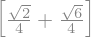

In [11]:
# defino las amplitudes del primer elemento
a= Matrix([1/sqrt(2),1/sqrt(2)])
# defino las amplitudes del segundo elemento
b= Matrix([sqrt(3)/2,1/2])

productoInterno(a,b)

Como resultado de todo lo visto en este apartado podemos concluir que :

$$|\psi\rangle=\langle+|\psi\rangle|+\rangle+\langle-|\psi\rangle|-\rangle$$

En consecuencia de puede afirmar que:

```{note}
Para una base ortonormal cualquiera $\{|a\rangle, |b\rangle  \} $, el estado de un qubit se puede escribir como:

$$|\psi\rangle=\alpha|a\rangle +\beta |b\rangle $$

donde $\alpha=\langle a|\psi\rangle$ y $\beta=\langle b|\psi\rangle$

```

Por lo tanto $\langle a|\psi\rangle$ es la amplitud de $| \psi\rangle$ en $|a\rangle$. En lenguaje matemático $\langle a|\psi\rangle$ es la proyección de $|\psi\rangle$ en $|a\rangle$

## Matrices de puertas cuánticas.

Como ya se ha comentado en un apartado anterior, una puerta U lo que en el fondo hace es cambiar los estados de superposición de los qubits delas base canónica, es decir $|0\rangle$ y $|1\rangle$. Utilizando notación simbólica, lo anterior quiere decir lo siguiente:

$$U|0\rangle=a|0\rangle+b|1\rangle={\binom{a}{b}},$$

$$U|1\rangle=c|0\rangle+d|1\rangle={\binom{c}{d}}.$$

Las expresiones anteriores se pueden expresar con un formato matricial, y en concreto en el caso anterior, la matriz de la puerta U sería la siguiente:

$$U=\left(\begin{array}{cc}
\left(\begin{array}{c}
a\\
b
\end{array}\right) & \left(\begin{array}{c}
c\\
d
\end{array}\right)\end{array}\right)=\left(\begin{array}{cc}
a & c\\
b & d
\end{array}\right)$$

Entonces si tenemos un qubit en el siguiente estado de superposición:

$$|\psi\rangle=\alpha|0\rangle+\beta|1\rangle={\binom{\alpha}{\beta}},$$

Aplicar una puerta U es equivalente a hacer la siguiente multiplicación matricial.

$$U|\psi\rangle={\binom{a\ c}{b\ d}}{\binom{\alpha}{\beta}}={\binom{a\alpha+c\beta}{b\alpha+d\beta}}.$$

Por lo tanto y utilizando el lenguaje de álgebra lineal, las puerta cuánticas en el fondo no son otra cosa que matrices. No obstante estas matrices deben de asegurar que la suma de probabilidades de colapsar hacia cada elemento de la base debe ser 1, es decir en el ejemplo anterior, se debe cumplir  

$$|a\alpha+c\beta|^{2}+|b\alpha+d\beta|^{2}=1$$

Veamos un ejemplo de esta situación:

$$U|0\rangle=\frac{\sqrt{2}-i}{2}|0\rangle-\frac{1}{2}|1\rangle=\left(\begin{array}{c}
\frac{\sqrt{2}-i}{2}\\
-\frac{1}{2}
\end{array}\right),$$

$$U|1\rangle={\frac{1}{2}}|0\rangle+{\frac{\sqrt{2}+i}{2}}|1\rangle=\left(\begin{array}{c}
\frac{1}{2}\\
\frac{\sqrt{2}+i}{2}
\end{array}\right).$$

En consecuencia la matriz asociada a esta puerta es la siguiente:

$$U=\left(\begin{array}{cc}
\frac{\sqrt{2}-i}{2} & \frac{1}{2}\\
-\frac{1}{2} & \frac{\sqrt{2}+i}{2}
\end{array}\right)$$

```{index} is_unitary (qiskit)
```

Para que una puerta se válida, debe ser unitaría, es decir que conserve la propiedad de que la suma de probabilidades  de colapsar hacia cada elemento de la base es 1. Con qiskit se puede comprobar si una matriz es unitaria o no utilizando la propiedad *is_unitary()*. Comprobemos esto para el ejemplo con el que estamos trabajando.

In [12]:
from qiskit.quantum_info.operators import Operator
import numpy as np

U= np.matrix([[(np.sqrt(2)-1j)/2,1/2],[-1/2,(np.sqrt(2)+1j)/2]])
op =Operator(U)

op.is_unitary()

True

En la <a href="https://algassert.com/quirk" target="_blank"> herramienta Quirk </a> que ya se ha presentado en un apartado anterior, también se puede crear las matrices asociadas a las puertas lógicas utilizando la opción del menú principal "*Make Gate*". al realizar esta operación se abre un cuadro de diálogo para introducir los elementos de la matriz, como se aprecia en la siguiente imagen.

<center>

![](images/gatesQuirt.PNG)

</center>

A esta puerta en el momento de la creación se le asigna un nombre, y esta nueva puerta aparecerá en en la pantalla de Quirk con el nombre que se le ha dado en su creación.

<center>

![](images/PuertaU.PNG)

</center>

Una vez creada la puerta se puede trabajar con ella, y obtener los resultados correspondientes, como se puede ver en el ejemplo de la siguiente imagen:

<center>

![](images/PuertaU_2.PNG)

</center>

en este caso podemos ver que $HTU|0\rangle$ tiene un 57.3% de probabilidad de colapsar a $|1\rangle$ y 42.7% hacia $|0\rangle$.

```{index} matrices puertas cuánticas
```
### Matrices más comúnmente utilizadas.

Ya se han comentado [en otro apartado anterior](puertasComunes), cómo se forman y cual es el resultado de las puertas cuánticas más usuales. En este apartado, vamos a exponer esas mismas puertas pero desde el lado algebraico, es decir viendo la matriz (tal y como se han definido anteriormente) que hay detrás de ellas. Estas matrices son las siguientes.

| Puerta    | Acción                                                 | Matriz                                                       |
|-----------|--------------------------------------------------------|--------------------------------------------------------------|
| Identidad | $I\|0\rangle=\|0\rangle$ <br> $I\|1\rangle=\|1\rangle$ | $I=\left(\begin{array}{cc} 1 & 0\\ 0 & 1 \end{array}\right)$ |
| Pauli X   | $X\|0\rangle=\|1\rangle$ <br> $X\|1\rangle=\|0\rangle$ | $X=\left(\begin{array}{cc} 0 & 1\\ 1 & 0 \end{array}\right)$ |
| Pauli Y   | $Y\|0\rangle=i\|1\rangle$ <br> $Y\|1\rangle=-i\|0\rangle$ | $Y=\left(\begin{array}{cc} 0 & -i\\ i & 0 \end{array}\right)$ |
| Pauli Z   | $X\|0\rangle=\|0\rangle$ <br> $X\|1\rangle=\|1\rangle$ | $Z=\left(\begin{array}{cc} 1 & 0\\ 0 & -1 \end{array}\right)$ |
| Fase S   | $S\|0\rangle=\|0\rangle$ <br> $S\|1\rangle=i\|1\rangle$ | $S=\left(\begin{array}{cc} 1 & 0\\ 0 & i \end{array}\right)$ |
| Puerta T | $T\|0\rangle=\|0\rangle$ <br> $T\|1\rangle=e^{i\pi/4}\|1\rangle$ | $T=\left(\begin{array}{cc} 1 & 0\\ 0 & e^{i\pi/4} \end{array}\right)$ |
| Hadamard H | $H\|0\rangle=\frac{1}{\sqrt{2}}\left(\|0\rangle+\|1\rangle\right)$ <br> $H\|1\rangle=\frac{1}{\sqrt{2}}\left(\|0\rangle-\|1\rangle\right)$ |   $H=\frac{1}{\sqrt{2}}\left(\begin{array}{cc}1 & 1\\1 & -1\end{array}\right)$  |

### Operando con puertas secuenciales.

Usando el álgebra lineal y la definición de las matrices dadas anteriormente, se puede calcular fácilmente el resultado de una secuencia de puertas cuánticas. Por ejemplo se puede demostrar que:

$${HSTH|0}\rangle={\frac{1}{2}}\left[\left(1+e^{i3\pi/4}\right)|0\rangle+\left(1-e^{i3\pi/4}\right)|1\rangle\right]$$

La operación manual se haría de la siguiente manera:

<center>

![](images/operaciones.PNG)

</center>

Mientras que si utilizamos el paquete Sympy de python, nos daría:

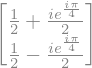

In [13]:
#Definimos las matrices
H=(1/sqrt(2))*Matrix([[1,1],[1,-1]])
S = Matrix([[1,0],[0,1*I]])
T = Matrix([[1,0],[0,exp(pi*I/4)]])

# Definimos el vector columna (1,0)
c = Matrix([1,0])

# Hacemos ahora la multiplicación

H*S*T*H*c

Observar que el resultado es el mismo que el obtenido de forma manual ya que $i=e^{i\pi/2}$ y entonces con una simple operación aritmética se llega al mismo resultado que el obtenido de forma manual.

Como estas matrices de puertas lógicas son utilizadas con mucha frecuencia, lo que se ha hecho es crear un fichero denominado "puertasLogicas.py" que contiene la definición de estas puertas. Entonces se le puede considerar que es un módulo de Python, con lo que no se tiene que hacer más que importarlo para trabajar con esas matrices de puertas lógicas.

El código que contiene este fichero es el siguiente:

>from sympy import *
>init_printing(use_unicode=True)
>
>I1=Matrix([[1,0],[0,1]])
>
>X=Matrix([[0,1],[1,0]])
>
>Y=Matrix([[0,-I],[I,0]])
>
>Z = Matrix([[1,0],[0,-1]])
>
>S = Matrix([[1,0],[0,I]])
>
>T = Matrix([[1,0],[0,exp(pi*I/4)]])
>
>H=(1/sqrt(2))*Matrix([[1,1],[1,-1]])

Entonces su forma de usos sería como se indica a continuación:

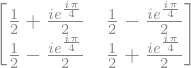

In [14]:
import puertasLogicas as pl

pl.H*pl.S*pl.T*pl.H

## Identidades entre circuitos.

Existen algunas indentidades importantes que conviene tenerlas en cuenta cuando trabajamos en programación cuántica. A continuación se muestran algunas de estas identidades.

Se puede comprobar que: HXH=Z, para comprobarlo vamos a ver si es cierto que HXH-Z=0

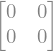

In [15]:
import puertasLogicas as pl

pl.H*pl.X*pl.H-pl.Z

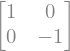

In [16]:
# También de esta manera
pl.H*pl.X*pl.H

## Unitariedad

Recordemos que si una puerta cuántica transforma $|0\rangle$ y $|1\rangle$ de la siguiente manera:

$$U|0\rangle=a|0\rangle+b|1\rangle=\binom{a}{b}$$

$$U|1\rangle=c|0\rangle+d|1\rangle=\binom{c}{d}$$

Entonces podemos escribir U mediante una matriz 2x2, de la siguiente manera:

$$U=\left(\begin{array}{cc}
a & c\\
b & d
\end{array}\right)$$

En estas circunstancias, si aplicamos es puerta al estado $|\Psi\rangle=\alpha|0\rangle+\beta|1\rangle$ se obtiene lo siguiente:


$$U|\psi\rangle=\left(\begin{array}{cc}
a & c\\
b & d
\end{array}\right)\left(\begin{array}{c}
\alpha\\
\beta
\end{array}\right)=\left[\begin{array}{c}
a\alpha+b\beta\\
b\alpha+d\beta
\end{array}\right]$$

Como puede verse, $U|\psi\rangle$ es un vector columna y también lo podemos escribir como un elemento ket $|U\psi\rangle$:

$$U|\psi\rangle=|U\psi\rangle$$

Ahora consideremos el conjugado transpuesto de $|U\psi\rangle$:

$$\langle U\psi|=(a^{*}\alpha^{*}+c^{*}\beta^{*}\quad b^{*}\alpha^{*}+d^{*}\beta^{*})=(\alpha^{*}\,\beta^{*})\left(\begin{array}{cc}
a^{*} & b^{*}\\
c^{*} & d^{*}
\end{array}\right) = \left(\alpha^{`*}\:\beta^{*}\right)\left(\begin{array}{cc}
a & c\\
b & d
\end{array}\right)^{\dagger}= \langle \psi | U^{\dagger}$$

Resumiendo:

$$\begin{array}{c l c r}{{|U\psi\rangle=U|\psi\rangle,}}\\ {{\langle U\psi|=\langle\psi|U^{\dagger}.}}\end{array}$$

Entonces, utilizando lo anterior, podemos determinar si una matriz U deja la probabilidad total igual a 1. Entonces consideremos una puerta cuántica dada por su matriz U y actúa sobre un estado $\psi$, es decir $U|\psi\rangle=|U\psi\rangle$. Para que U sea una puerta cuántica, debe estar normalizada, es decir su producto interno consigo mismo debe ser igual a 1:

$$\begin{array}{c}{{\langle U\psi|U\psi\rangle=1}}\\ {{\langle\psi|U^{\dagger}U|\psi\rangle=\langle\psi|\psi,}}\\ {{U^{\dagger}U=I.}}\end{array}$$

```{index} Unitary (matrix)
```

Una matriz que verifica la condición anterior, se denomina **matriz unitaria**, y en consecuencia podemos concluir que:

:::{note}
Las puertas cuánticas son matrices unitarias, y además si una matriz es unitaria entonces es una puerta cuántica
:::

Tenemos varias formas de comprobar si una matriz es unitaria o no. Una forma es utilizar la propiedad <a href="https://qiskit.org/documentation/stable/0.19/stubs/qiskit.quantum_info.Operator.is_unitary.html" target="_blank"> is_unitary </a> de qiskit. Pero también se puede utilizar la multiplicación de matrices de Sympy. Hay que tener en cuenta que la matriz transpuesta conjugada se obtiene utilizando el método *.H*. Veamos un ejemplo. Supongamos que tenemos la siguiente matriz:

$$U=\frac{1}{\sqrt{2}}\left(\begin{array}{cc}
1 & i\\
-i & 1
\end{array}\right)$$

Comprobemos mediante sympy si es o no unitaria

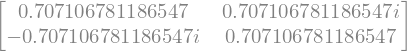

In [17]:
#Definimos y presentamos la matriz
A=(1/np.sqrt(2))*Matrix([[1,I],[-I,1]])
A

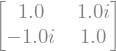

In [18]:
# Multiplicamos la transpuesta conjugada por esa matriz
A.H*A

Como en el ejemplo anterior, no se obtiene la matriz identidad no podemos utilizar esa matriz como una puerta cuántica. Comprobemos si la matriz 

$$U=\frac{1}{\sqrt{2}}\left(\begin{array}{cc}
1 & i\\
i & -1
\end{array}\right)$$

es unitaria:

In [19]:
U=np.array([[1/np.sqrt(2),1j/np.sqrt(2)],[1j/np.sqrt(2),-1/np.sqrt(2)]])
U1=Operator(U)
U1.is_unitary()

False

En consecuencia no sería unitaria. Probemos con 

$$U=\frac{1}{\sqrt{2}}\left(\begin{array}{cc}
1 & 1\\
i & -i
\end{array}\right)$$

In [20]:
U=np.array([[1/np.sqrt(2),1/np.sqrt(2)],[1j/np.sqrt(2),-1j/np.sqrt(2)]])
U1=Operator(U)
U1.is_unitary()

True

Entonces la matriz anterior sería unitaria y por lo tanto se corresponde con alguna puerta cuántica. Ademas:

$$U|0\rangle = |i\rangle \qquad U|1\rangle=-|i\rangle$$

```{index} reversibilidad
```
## Reversibilidad.

Diremos que una matriz es reversible o invertible si existe una matriz, denotada por $M^{-1}$ de forma que se cumple:

$$M\cdot M^{-1}=M^{-1}\cdot M=I$$

Ahora ya sabemos que una matriz correspondiente a una puerta cuántica verifica:

$$U^{\dagger}U=UU^{\dagger}=I$$


De la expresión anterior además se puede deducir que U también verifica que la matriz transpuesta conjugada debe ser igual a la matriz inversa, es decir:

$$U^{-1}=U^{\dagger}$$

Por lo tanto, se concluye lo siguiente:

```{note}
La matriz de una puerta cuántica también deber ser reversible y la inversa coincide con la matriz transpuesta conjugada
```

## Producto externo (Outer).

En esta sección vamos a mostrar lo que se entiende por producto externo de matrices o *outer product*. El resultado que se obtiene es otra matriz, no un escalar como era el caso del producto interno ya visto en secciones anteriores.

Consideremos dos estados cuánticos:

$$ |\psi\rangle=\alpha|0\rangle+\beta|1\rangle,\quad|\phi\rangle=\gamma|0\rangle+\delta|1\rangle. $$

En lugar de hacer el producto interno $\langle \psi | \phi\rangle$, vamos a definir el producto externo de la siguiente manera:

$$ |\psi\rangle\langle\phi|={\binom{\alpha}{\beta}}(\gamma^{*}\ \delta^{*}) = \binom{\alpha\gamma^{*} \quad \alpha\delta^{*}}{\beta\gamma^{*} \quad \beta\delta^{*}} $$

Por lo tanto el resultado es una matriz 2x2, y entonces podemos utilizar este producto externo para construir otras puertas cuánticas. Por ejemplo consideremos lo siguiente:

$$ U=|1\rangle\langle0|+|0\rangle\langle1|. $$


Y ahora veamos cómo actúa sobre el estado $|\psi\rangle=\alpha|0\rangle+\beta|1\rangle$.

$$\begin{align*}
U|\psi\rangle & =\left(|1\rangle\langle0|+|0\rangle\langle1|\right)\left(\alpha|0\rangle+\beta|1\rangle\right)=\\
= & \alpha|1\rangle\underset{1}{\underbrace{\langle0|0\rangle}}+\beta|1\rangle\underset{0}{\underbrace{\langle0|1\rangle}+}\alpha|0\rangle\underset{0}{\underbrace{\langle1|0\rangle}}+\beta|0\rangle\underset{1}{\underbrace{\langle1|1\rangle}}=\\
= & \alpha|1\rangle+\beta|0\rangle=\beta|0\rangle+\alpha|1\rangle
\end{align*}$$

Y como $|\alpha|^2+|\beta|^2=1$, podemos concluir que la matriz U corresponde a una puerta cuántica válida. También hemos visto que esta puerta intercambia $|0\rangle$ con $|1\rangle$, por lo tanto se trata de la puerta X. Lo podemos ver igualmente de la siguiente manera:

$$U=|1\rangle\langle0|+|0\rangle\langle1|={\binom{0}{1}}(1\ 0)+{\binom{1}{0}}+(0 \, 1)={\binom{0 \, 0}{1\ 0}}+{\binom{0\ 1}{0}}={\binom{0 \  1}{1\ 0}}$$

Se puede demostrar lo siguiente:

$$\phi\rangle\langle\psi|=|\psi\rangle\langle\phi|^{\dagger}$$

Pues en efecto se tiene lo siguiente:

$$|\phi\rangle\langle\psi|={\binom{\gamma}{\delta}}(\alpha^{*}\:\beta^{*})={\binom{\gamma\alpha^{*}\;\gamma\beta^{*}}{\delta\alpha^{*}\;\delta\beta^{*}}}={\binom{\alpha\gamma^{*}\;\alpha\delta^{*}}{\beta\gamma^{*}}^{\gamma}}=|\psi\rangle\langle\phi|^{\dagger}$$



## Relación de completitud.

Recordar  [de un apartado anteriormente visto](proyecciones) que para cualquier base ortonormal $\{|a\rangle , |b\rangle \}$ el estado de un qubit puede ser escrito de la de la siguiente manera:

$$|\psi\rangle=\alpha|a\rangle+\beta|b\rangle,$$

de tal manera que $\alpha=\langle a|\psi\rangle\operatorname{y}\beta=\langle b|\psi\rangle$. Sustituyendo estos valores.

$$|\psi\rangle=\underset{escalar}{\underbrace{\langle a|\psi\rangle}}|a\rangle+\underset{escalar}{\underbrace{\langle b|\psi\rangle}}|b\rangle$$

Como ya se ha dicho el producto interno es un escalar o número y por lo tanto en lugar de multiplicar por la izquierda, lo pasamos al lado derecho:

$$|\psi\rangle=\underset{escalar}{|a\rangle\underbrace{\langle a|\psi\rangle}}+\underset{escalar}{|b\rangle\underbrace{\langle b|\psi\rangle}}$$

Lo anterior lo podemos escribir de la siguiente manera con la finalidad de dejar más claro su significado:

$$\psi\rangle=|a\rangle\langle a||\psi\rangle+|b\rangle\langle b| |{\boldsymbol{\psi}}\rangle$$

Ahora tenemos dos productos externos $|a\rangle\langle a|\mathrm{\,y\,}|b\rangle\langle b|$ y podemos reducir la expresión anterior a lo siguiente:

$$|\psi\rangle=(|a\rangle\langle a|+|b\rangle\langle b|)|\psi\rangle$$

Commo esto es cierto para cualquier $|\psi\rangle$ , entonces se puede concluir que:

$$|a\rangle\langle a|+|b\rangle\langle b|=I$$

Esta propiedad se conoce como *relación de completitud* e indica que el esatdo de cualquier qubit en términos de $|a\rangle \, y \, |b\rangle$. En consecuencia, podemos afirmar que:

```{note}
Una base ortonormal completa $\{|a\rangle,|b\rangle\}$ satisface la relación de completitud siguiente:

$$|a\rangle\langle a|+|b\rangle\langle b|=I$$
```